Loritah Bukirwa - J24M19/003

# **Instructions:**

> The National Coffee Research Institute generated disease resistant coffee varieties which they analysed for the quality using a cupping assessment. 

You will use the provided Excel workbook labelled "Uganda coffee_traindataping.xlsx" Uganda coffee_traindataping.xlsx Download Uganda coffee_traindataping.xlsx containing three sheets:  

a) Sheet 1; Training Data

b) Sheet 2: Test Data 1

c) Sheet 3: Test Data 2

Transform the datasets and make predictions on the  "OVERALL SCORE" of coffee in two different areas of ORIGIN;

1) Kayunga (10 MARKS)

2) Rwenzori (10 MARKS)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#import the data
coffee_traindata =  pd.read_excel("Uganda Coffee_Cupping.xlsx", header=1, sheet_name = "Training Data")

print('Data:', coffee_traindata.shape)
coffee_traindata.head(10)


Data: (75, 12)


,ORIGIN,VARIETY,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
0,Ibanda,KR3,7.00,6.00,6.50,6.75,6.50,6.75,8.00,10,10,8.00
1,Ibanda,KR3,8.00,7.75,7.00,7.00,7.25,7.00,7.00,10,10,8.25
2,Ibanda,KR3,8.25,7.25,7.00,7.00,6.75,6.75,7.00,10,10,6.75
3,Ibanda,KR3,7.50,7.75,7.50,7.50,7.25,7.75,7.50,10,10,7.50
4,Ibanda,KR3,7.00,7.25,8.00,8.00,7.75,7.75,7.00,10,10,7.25
5,Mityana,KR3,8.00,7.50,7.50,7.50,7.00,7.25,7.50,10,10,7.75
6,Mityana,KR3,7.00,6.50,6.50,7.50,7.00,6.75,7.00,10,10,7.00
7,Mityana,KR3,7.00,7.00,7.75,7.00,6.00,6.25,7.25,10,10,7.00
8,Mityana,KR3,8.00,8.00,7.00,8.00,8.00,7.00,8.00,10,10,8.75
9,Mityana,KR3,7.50,7.75,7.50,7.50,7.50,7.25,7.50,10,10,7.50


In [3]:
#remove duplicate rows 
coffee_traindata = coffee_traindata.drop_duplicates()
print('Data:', coffee_traindata.shape)

Data: (75, 12)


In [4]:
coffee_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORIGIN           75 non-null     object 
 1   VARIETY          75 non-null     object 
 2   FRAGRANCE/AROMA  75 non-null     float64
 3   FLAVOR           75 non-null     float64
 4   SALT/ ACID       75 non-null     float64
 5   BITTER/ SWEET    75 non-null     float64
 6   AFTERTASTE       75 non-null     float64
 7   MOUTH FEEL       75 non-null     float64
 8   BALANCE          75 non-null     float64
 9   UNIFORMITY       75 non-null     int64  
 10  CLEAN CUPS       75 non-null     int64  
 11  OVERALL SCORE    75 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7.2+ KB


In [5]:
#checking for missing data.
coffee_traindata.isna().sum()

ORIGIN             0
VARIETY            0
FRAGRANCE/AROMA    0
FLAVOR             0
SALT/ ACID         0
BITTER/ SWEET      0
AFTERTASTE         0
MOUTH FEEL         0
BALANCE            0
UNIFORMITY         0
CLEAN CUPS         0
OVERALL SCORE      0
dtype: int64

There is no missing data in the training dataset

In [6]:
coffee_traindata.describe()

,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
count,75.000000,75.000000,75.000000,75.0000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,7.408667,7.341333,7.143333,7.2400,7.220000,7.184667,7.550000,9.866667,9.866667,7.505467
std,0.468780,0.457621,0.388112,0.3799,0.452022,0.404616,0.809571,0.502247,0.502247,0.536050
min,6.500000,6.000000,6.000000,6.0000,6.000000,6.250000,6.750000,8.000000,8.000000,6.000000
25%,7.000000,7.000000,7.000000,7.0000,7.000000,7.000000,7.000000,10.000000,10.000000,7.000000
50%,7.250000,7.500000,7.000000,7.2500,7.250000,7.000000,7.500000,10.000000,10.000000,7.500000
75%,7.750000,7.750000,7.500000,7.5000,7.500000,7.500000,7.750000,10.000000,10.000000,7.750000
max,8.750000,8.000000,8.000000,8.2500,8.250000,8.000000,10.000000,10.000000,10.000000,9.000000


In [7]:
coffee_traindata.nunique()

ORIGIN              3
VARIETY             5
FRAGRANCE/AROMA    11
FLAVOR              9
SALT/ ACID          8
BITTER/ SWEET       9
AFTERTASTE          9
MOUTH FEEL          9
BALANCE             7
UNIFORMITY          2
CLEAN CUPS          2
OVERALL SCORE      13
dtype: int64

> Problem statement = creating predictive model for overall score for Kayunga and Rwenzori


> Target Variable = Overall Score


> Predictors = Variety to Clean Cups


Overall Score = numerical and continuous 

array([[<Axes: title={'center': 'FRAGRANCE/AROMA'}>,
        <Axes: title={'center': 'FLAVOR'}>,
        <Axes: title={'center': 'SALT/ ACID'}>],
       [<Axes: title={'center': 'BITTER/ SWEET'}>,
        <Axes: title={'center': 'AFTERTASTE'}>,
        <Axes: title={'center': 'MOUTH FEEL'}>],
       [<Axes: title={'center': 'BALANCE'}>, <Axes: >, <Axes: >]],
      dtype=object)

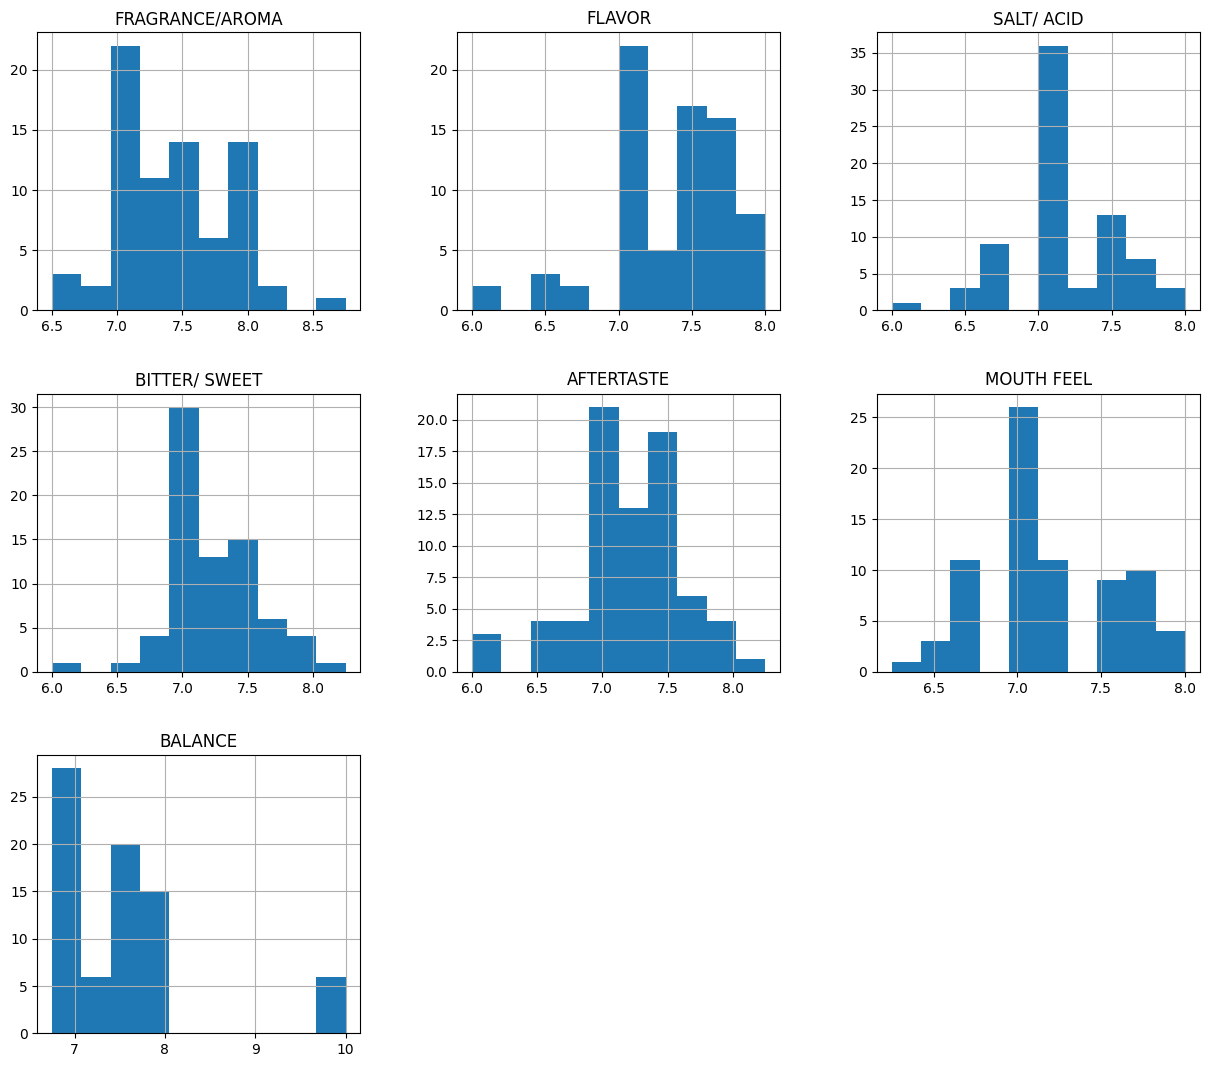

In [47]:
#plotting the continuous predictors 
coffee_traindata.hist(['FRAGRANCE/AROMA','FLAVOR','SALT/ ACID','BITTER/ SWEET','AFTERTASTE', 'MOUTH FEEL', 'BALANCE'], figsize =(15,13))

From above distribution, BALANCE is positively skewed, FLAVOR is negatively skewed while the rest show a normal distribution 

In [48]:
# Calculating correlation matrix
Cont_vars=['FRAGRANCE/AROMA','FLAVOR','SALT/ ACID','BITTER/ SWEET','AFTERTASTE', 'MOUTH FEEL', 'BALANCE','UNIFORMITY','CLEAN CUPS','OVERALL SCORE']

# Creating the correlation matrix
coffee_corr =coffee_traindata[Cont_vars].corr()
coffee_corr

,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
FRAGRANCE/AROMA,1.000000,0.351069,-0.047771,-0.125658,0.220464,-0.114707,-0.035875,0.177162,0.177162,0.396466
FLAVOR,0.351069,1.000000,0.400834,0.414382,0.629962,0.457785,-0.274208,0.171291,0.171291,0.326124
SALT/ ACID,-0.047771,0.400834,1.000000,0.485297,0.381099,0.560624,-0.181712,0.134030,0.134030,0.113912
BITTER/ SWEET,-0.125658,0.414382,0.485297,1.000000,0.440880,0.488007,-0.234521,0.134566,0.134566,-0.005202
AFTERTASTE,0.220464,0.629962,0.381099,0.440880,1.000000,0.680901,-0.185101,0.279762,0.279762,0.465113
MOUTH FEEL,-0.114707,0.457785,0.560624,0.488007,0.680901,1.000000,-0.015161,0.189297,0.189297,0.230638
BALANCE,-0.035875,-0.274208,-0.181712,-0.234521,-0.185101,-0.015161,1.000000,0.116323,0.116323,0.238200
UNIFORMITY,0.177162,0.171291,0.134030,0.134566,0.279762,0.189297,0.116323,1.000000,1.000000,0.153324
CLEAN CUPS,0.177162,0.171291,0.134030,0.134566,0.279762,0.189297,0.116323,1.000000,1.000000,0.153324
OVERALL SCORE,0.396466,0.326124,0.113912,-0.005202,0.465113,0.230638,0.238200,0.153324,0.153324,1.000000


FRAGRANCE/AROMA    0.396466
FLAVOR             0.326124
SALT/ ACID         0.113912
BITTER/ SWEET     -0.005202
AFTERTASTE         0.465113
MOUTH FEEL         0.230638
BALANCE            0.238200
UNIFORMITY         0.153324
CLEAN CUPS         0.153324
OVERALL SCORE      1.000000
Name: OVERALL SCORE, dtype: float64

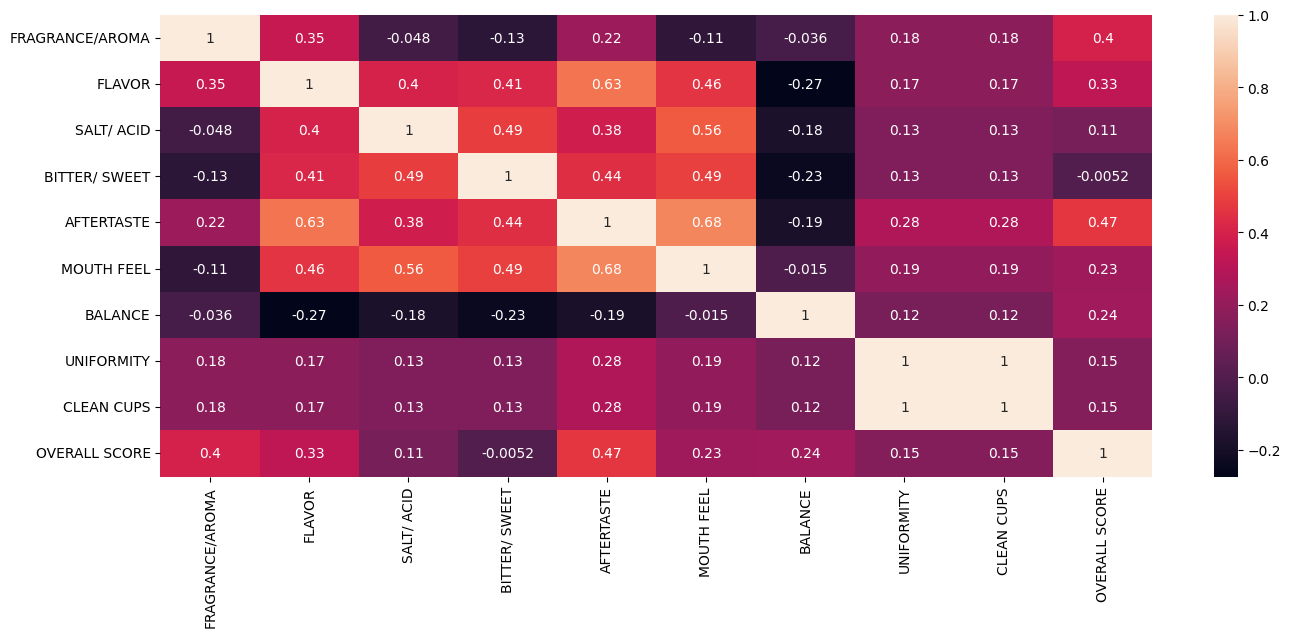

In [49]:
#Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(coffee_corr, annot=True)

coffee_corr['OVERALL SCORE']

BITTER/SWEET has a negative correlation with the overall score, AFTERTASTE, FLAVOR & FRAGRANCE/AROMA have a relatively positive correlation, while all the other predictors have a moderate correlation.

In [50]:
# Splitting the data into features (X) and target variable (y)
X = coffee_traindata.drop(columns=["ORIGIN", "VARIETY", "OVERALL SCORE"])
y = coffee_traindata["OVERALL SCORE"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)



In [51]:
#As data is continuous, we shall utilize Linear regression.
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
#Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R**2 Score:", r2)


Mean Squared Error: 0.24502473064629057
R**2 Score: 0.2734027756782157


Using this model gives us an R2 score of 0.37 which is low prediction. Thus we try KNN

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Prepare the data
X = coffee_traindata.drop(columns=["ORIGIN", "VARIETY", "OVERALL SCORE"])
y = coffee_traindata["OVERALL SCORE"]

#Features are standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state= 42)

# Training the kNN model
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("Mean Squared Error with kNN:", mse_knn)
print("R2 Score with kNN:", r2_knn)


Mean Squared Error with kNN: 0.13900000000000007
R2 Score with kNN: 0.587808896210873


With a 58.78%, we can now deploy the model. 

> Testing data on Kayunga

In [58]:
# Now, make predictions on the test data for Kayunga
test_coff1 = pd.read_excel("Uganda Coffee_Cupping.xlsx", header=1, sheet_name="Test Data 1")

test_coff1.head(5)

,ORIGIN,VARIETY,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
0,Kayunga,KR3,7.00,6.00,6.5,6.75,6.50,6.75,8.0,10,10,NaN
1,Kayunga,KR3,8.00,7.75,7.0,7.00,7.25,7.00,7.0,10,10,NaN
2,Kayunga,KR3,8.25,7.25,7.0,7.00,6.75,6.75,7.0,10,10,NaN
3,Kayunga,KR3,7.50,7.75,7.5,7.50,7.25,7.75,7.5,10,10,NaN
4,Kayunga,KR3,7.00,7.25,8.0,8.00,7.75,7.75,7.0,10,10,NaN


In [59]:
# Filter test data for Kayunga
kayunga_data = test_coff1[test_coff1['ORIGIN'] == 'Kayunga']

# Extract features for prediction
X_kayunga = kayunga_data.drop(columns=["ORIGIN", "VARIETY", "OVERALL SCORE"])

# Make predictions
kayunga_pred = model.predict(X_kayunga)

print("OVERALL SCORE Predictions for Kayunga:", kayunga_pred)



OVERALL SCORE Predictions for Kayunga: [6.74283671 7.63656957 7.29353485 7.48232587 7.5900461  7.81156855
 7.68861413 7.89265602 7.51201327 7.24531483 7.09782437 6.62435467
 7.48906927 7.5387517  7.49494202 7.54524885 7.68733601 7.53141825
 7.21047066 8.0966205  7.47081908 7.99192411 7.42846064 7.51926795
 7.07020363]


Showing the data in the Kayunga dataset

In [63]:
# Fill in the empty 'OVERALL SCORE' column with the predicted values
kayunga_data['OVERALL SCORE'] = kayunga_pred

kayunga_data.head(10)

,ORIGIN,VARIETY,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
0,Kayunga,KR3,7.00,6.00,6.5,6.75,6.50,6.75,8.00,10,10,6.742837
1,Kayunga,KR3,8.00,7.75,7.0,7.00,7.25,7.00,7.00,10,10,7.636570
2,Kayunga,KR3,8.25,7.25,7.0,7.00,6.75,6.75,7.00,10,10,7.293535
3,Kayunga,KR3,7.50,7.75,7.5,7.50,7.25,7.75,7.50,10,10,7.482326
4,Kayunga,KR3,7.00,7.25,8.0,8.00,7.75,7.75,7.00,10,10,7.590046
5,Kayunga,KR4,8.00,7.00,7.0,7.00,7.50,7.00,7.75,10,10,7.811569
6,Kayunga,KR4,8.00,8.00,7.0,7.00,7.25,7.00,7.00,10,10,7.688614
7,Kayunga,KR4,8.00,7.75,7.5,7.50,7.75,7.75,7.25,10,10,7.892656
8,Kayunga,KR4,7.50,7.75,7.0,7.25,7.25,7.25,7.25,10,10,7.512013
9,Kayunga,KR4,7.00,8.00,7.5,8.00,7.00,7.75,7.50,10,10,7.245315


Testing data on Rwenzori.

In [62]:
# Now, make predictions on the test data for Rwenzori
test_coff2 = pd.read_excel("Uganda Coffee_Cupping.xlsx", header=1, sheet_name="Test Data 2")

test_coff2.head(5)

,ORIGIN,VARIETY,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
0,Rwenzori,KR3,7.25,6.75,6.75,7.50,6.75,6.75,6.75,10,10,NaN
1,Rwenzori,KR3,7.50,7.75,7.50,7.75,7.50,7.50,7.50,10,10,NaN
2,Rwenzori,KR3,7.55,8.00,7.00,7.75,8.00,8.00,7.75,10,10,NaN
3,Rwenzori,KR3,8.00,7.00,6.00,7.00,7.00,7.00,10.00,10,10,NaN
4,Rwenzori,KR3,6.50,7.00,6.75,7.00,7.00,7.00,7.00,10,10,NaN


In [64]:
# Filter test data for Kayunga
rwenzori_data = test_coff2[test_coff2['ORIGIN'] == 'Rwenzori']

# Extract features for prediction
X_rwenzori= rwenzori_data.drop(columns=["ORIGIN", "VARIETY", "OVERALL SCORE"])

# Make predictions
rwenzori_pred = model.predict(X_rwenzori)

print("OVERALL SCORE Predictions for Rwenzori:", rwenzori_pred)


OVERALL SCORE Predictions for Rwenzori: [6.89654983 7.72761473 7.99752262 7.78090125 6.96473257 7.12519579
 7.77761635 8.07363021 7.92248747 7.04722837 6.8914847  7.40499309
 7.97843963 7.00797924 7.41458713 7.94051779 7.34533075 7.14061386
 7.7852227  7.55791408 7.28093947 7.55893843 7.52805474 7.5681215
 7.624468  ]


In [65]:
# Fill in the empty 'OVERALL SCORE' column with the predicted values
rwenzori_data['OVERALL SCORE'] = rwenzori_pred

rwenzori_data.head(10)

,ORIGIN,VARIETY,FRAGRANCE/AROMA,FLAVOR,SALT/ ACID,BITTER/ SWEET,AFTERTASTE,MOUTH FEEL,BALANCE,UNIFORMITY,CLEAN CUPS,OVERALL SCORE
0,Rwenzori,KR3,7.25,6.75,6.75,7.50,6.75,6.75,6.75,10,10,6.896550
1,Rwenzori,KR3,7.50,7.75,7.50,7.75,7.50,7.50,7.50,10,10,7.727615
2,Rwenzori,KR3,7.55,8.00,7.00,7.75,8.00,8.00,7.75,10,10,7.997523
3,Rwenzori,KR3,8.00,7.00,6.00,7.00,7.00,7.00,10.00,10,10,7.780901
4,Rwenzori,KR3,6.50,7.00,6.75,7.00,7.00,7.00,7.00,10,10,6.964733
5,Rwenzori,KR4,7.00,7.00,7.00,7.25,7.00,7.25,7.50,10,10,7.125196
6,Rwenzori,KR4,7.00,7.75,7.75,7.75,7.50,7.25,7.75,10,10,7.777616
7,Rwenzori,KR4,7.25,8.00,7.00,7.25,8.25,8.00,7.50,10,10,8.073630
8,Rwenzori,KR4,8.00,7.00,7.00,6.00,7.00,7.00,10.00,10,10,7.922487
9,Rwenzori,KR4,7.00,7.00,7.00,7.00,7.00,7.00,6.75,10,10,7.047228
